# Проект: классификация

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, f_classif

## Часть 1. Знакомство с данными, обработка пропусков и выбросов

### Задание 1

In [3]:
df = pd.read_csv('bank_fin.csv', sep = ';')

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,"2 343,00 $",yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,"45,00 $",no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,"1 270,00 $",yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,"2 476,00 $",yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,"184,00 $",no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [9]:
# исследуйте данные на предмет пропусков. Где есть пропущенные значения? Сколько их?
df.isnull().sum().sort_values(ascending=False)

balance      25
age           0
day           0
poutcome      0
previous      0
pdays         0
campaign      0
duration      0
month         0
contact       0
job           0
loan          0
housing       0
default       0
education     0
marital       0
deposit       0
dtype: int64

### Задание 2

In [12]:
# есть ли в признаке job пропущенные значения? Возможно, они обозначены каким-то специальным словом?
df['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

### Задание 3

In [5]:
df['balance'] = df['balance'].str.replace('$', '')
df['balance'] = df['balance'].str.replace(',', '.')
df['balance'] = df['balance'].str.replace(' ', '')
df['balance'] = df['balance'].astype(float)

In [6]:
df['balance']

0        2343.0
1          45.0
2        1270.0
3        2476.0
4         184.0
          ...  
11157       1.0
11158     733.0
11159      29.0
11160       0.0
11161       0.0
Name: balance, Length: 11162, dtype: float64

In [7]:
df['balance'].mean()

1529.1290293615875

### Задание 4

In [47]:
df['balance'].sort_values()

6797    -6847.0
1525    -3058.0
10642   -2712.0
6388    -2282.0
6010    -2049.0
          ...  
5481        NaN
5570        NaN
5571        NaN
9954        NaN
9955        NaN
Name: balance, Length: 11162, dtype: float64

In [8]:
df['balance'] = df['balance'].fillna(value = df['balance'].median())

In [52]:
df['balance'].sort_values()

6797     -6847.0
1525     -3058.0
10642    -2712.0
6388     -2282.0
6010     -2049.0
          ...   
2468     52587.0
10143    56831.0
8208     66653.0
3043     81204.0
3380     81204.0
Name: balance, Length: 11162, dtype: float64

In [9]:
df['balance'].mean()

1526.9360329690019

### Задание 5

In [60]:
df['job']

0             admin.
1             admin.
2         technician
3           services
4             admin.
            ...     
11157    blue-collar
11158       services
11159     technician
11160     technician
11161     technician
Name: job, Length: 11162, dtype: object

In [10]:
df['job'].mode()[0]

'management'

In [11]:
df['job'] = df['job'].apply(lambda x: df['job'].mode()[0] if x=='unknown' else x)
df['education'] = df['education'].apply(lambda x: df['education'].mode()[0] if x=='unknown' else x)

In [12]:
df_new = df[(df['job'] == 'management') & (df['education'] == 'secondary')]

In [13]:
df_new['balance'].mean()

1598.8829787234042

### Задание 6

In [26]:
df['balance'].describe()

count    11162.000000
mean      1526.936033
std       3224.829691
min      -6847.000000
25%        123.000000
50%        550.000000
75%       1699.000000
max      81204.000000
Name: balance, dtype: float64

In [28]:
q1 = df['balance'].describe()['25%']
q1

123.0

In [29]:
q3 = df['balance'].describe()['75%']
q3

1699.0

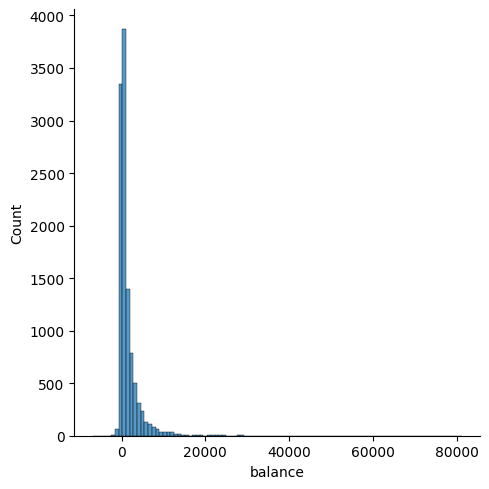

In [30]:
sns.displot(df['balance'], bins=100) #сразу считает count признака

plt.show()

In [34]:
iqr = q3 - q1
iqr

1576.0

In [37]:
lower_bound = q1 - iqr*1.5
lower_bound

-2241.0

In [38]:
upper_bound = q3 + iqr*1.5
upper_bound

4063.0

In [43]:
df = df[(df['balance'] >= lower_bound) & (df['balance'] <= upper_bound)]
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45.0,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270.0,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476.0,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184.0,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1.0,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733.0,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29.0,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0.0,no,yes,cellular,8,may,9,2,172,5,failure,no


## Часть 2:  Разведывательный анализ

### Задание 1

In [44]:
df['deposit'].value_counts()

no     5424
yes    4681
Name: deposit, dtype: int64

### Задания 2 и 3

In [45]:
df['age'].max()

95

In [46]:
df['duration'].min()

2

### Задания 4 и 5

In [49]:
# job = возраст
# marital = семейное положение
# education = уровень обазованиия
# default = есть ли просроченный кредит
# housing = есть ли кредит на жильё
# loan = есть ли кредит на личные нужды
# balance = баланс

# СТАРТ МАРКЕТИНГОВОЙ КОМПАНИИ
# contact = тип контакта с клиентом
# когда? month, day, duration = продолжительность контакта в секундах
# campaign = кол-во контактов с клиентом в течение текущей кампании
# pdays = кол-во пропущенных дней с момента последней кампании до контакта в текущей
# previous = кол-во контактов до текущей кампании
# poutcome = результат прошлой маркетинговой кампании

# deposit = согласится ли клиент открыть депозит в банке, целевая переменная

In [47]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45.0,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270.0,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476.0,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184.0,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [51]:
df['month'].value_counts().shape

(12,)

In [54]:
df['job'].value_counts().shape

(11,)

### Задание 6

In [55]:
df['poutcome'].value_counts()

unknown    7570
failure    1109
success     945
other       481
Name: poutcome, dtype: int64

### Задание 7

In [56]:
df['contact'].value_counts()

cellular     7283
unknown      2161
telephone     661
Name: contact, dtype: int64

In [59]:
df[df['poutcome'] == 'failure'].groupby('month')['duration'].count().sort_values()

month
dec     11
mar     26
jan     39
jul     42
sep     46
jun     48
oct     62
aug     84
feb    127
nov    139
apr    150
may    335
Name: duration, dtype: int64

### Задание 8

In [62]:
def get_feature(age):
    if age < 30:
        return '<30'
    if (age >= 30) & (age < 40):
        return '30-40'
    if (age >= 40) & (age < 50):
        return '40-50'
    if (age >= 50) & (age < 60):
        return '50-60'
    if age >= 60:
        return '60+'

In [63]:
df['age_cat'] = df['age'].apply(get_feature)

In [65]:
df['deposit'].value_counts()

no     5424
yes    4681
Name: deposit, dtype: int64

In [66]:
df['deposit_bool'] = np.where(df['deposit'] == 'no', 0, 1)

In [67]:
df['deposit_bool'].value_counts()

0    5424
1    4681
Name: deposit_bool, dtype: int64

In [68]:
df.groupby('age_cat')['deposit_bool'].sum()

age_cat
30-40    1716
40-50     938
50-60     670
60+       496
<30       861
Name: deposit_bool, dtype: int64

In [69]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_cat,deposit_bool
0,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,50-60,1
1,56,admin.,married,secondary,no,45.0,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,50-60,1
2,41,technician,married,secondary,no,1270.0,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,40-50,1
3,55,services,married,secondary,no,2476.0,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,50-60,1
4,54,admin.,married,tertiary,no,184.0,no,no,unknown,5,may,673,2,-1,0,unknown,yes,50-60,1


In [72]:
pd.pivot_table(data = df, index = 'age_cat', columns = 'poutcome', values = 'marital', aggfunc = 'count')

poutcome,failure,other,success,unknown
age_cat,,,,
30-40,486,197,324,2954
40-50,262,102,173,1845
50-60,173,58,133,1290
60+,71,36,152,394
<30,117,88,163,1087


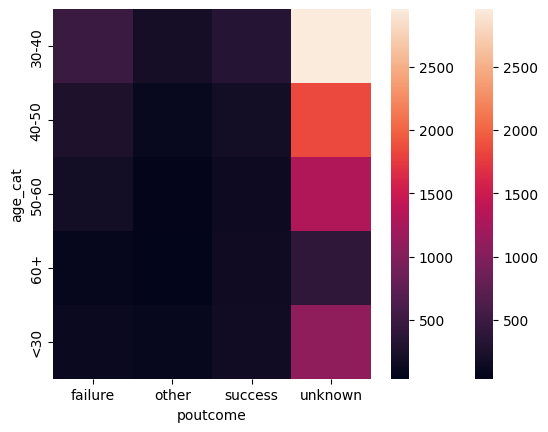

In [74]:
sns.heatmap(data = pd.pivot_table(data = df, index = 'age_cat', columns = 'poutcome', values = 'marital', aggfunc = 'count'))

plt.show()

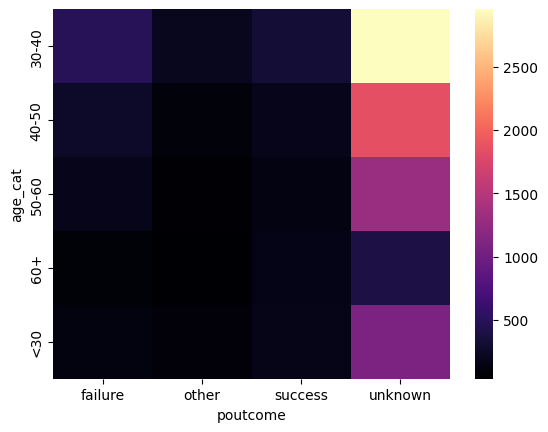

In [75]:
sns.heatmap(data = pd.pivot_table(data = df, index = 'age_cat', columns = 'poutcome', values = 'marital', aggfunc = 'count'), cmap = 'magma')

plt.show()

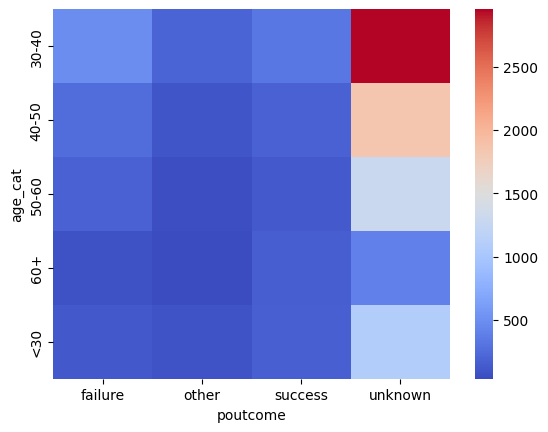

In [77]:
sns.heatmap(data = pd.pivot_table(data = df, index = 'age_cat', columns = 'poutcome', values = 'marital', aggfunc = 'count'), cmap = 'coolwarm')

plt.show()

### Задания 9 и 10

In [78]:
df['job'].value_counts()

management       2315
blue-collar      1807
technician       1638
admin.           1246
services          868
retired           663
self-employed     358
unemployed        332
student           326
entrepreneur      300
housemaid         252
Name: job, dtype: int64

In [81]:
df.groupby('marital')['deposit_bool'].mean()

marital
divorced    0.469839
married     0.422047
single      0.534080
Name: deposit_bool, dtype: float64

In [82]:
df.groupby(['marital', 'poutcome'])['campaign'].count()

marital   poutcome
divorced  failure      104
          other         50
          success       91
          unknown      932
married   failure      645
          other        240
          success      522
          unknown     4308
single    failure      360
          other        191
          success      332
          unknown     2330
Name: campaign, dtype: int64

### Задание 11

In [84]:
df['education'].value_counts()

secondary    5517
tertiary     3239
primary      1349
Name: education, dtype: int64

In [83]:
df['deposit'].value_counts()

no     5424
yes    4681
Name: deposit, dtype: int64

In [86]:
df[df['deposit'] == 'yes']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_cat,deposit_bool
0,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,50-60,1
1,56,admin.,married,secondary,no,45.0,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,50-60,1
2,41,technician,married,secondary,no,1270.0,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,40-50,1
3,55,services,married,secondary,no,2476.0,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,50-60,1
4,54,admin.,married,tertiary,no,184.0,no,no,unknown,5,may,673,2,-1,0,unknown,yes,50-60,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5284,78,retired,divorced,primary,no,1389.0,no,no,cellular,8,apr,335,1,-1,0,unknown,yes,60+,1
5285,30,management,single,tertiary,no,398.0,no,no,cellular,27,oct,102,1,180,3,success,yes,30-40,1
5286,69,retired,divorced,tertiary,no,247.0,no,no,cellular,22,apr,138,2,-1,0,unknown,yes,60+,1
5287,48,entrepreneur,married,secondary,no,0.0,no,yes,cellular,28,jul,431,2,-1,0,unknown,yes,40-50,1


In [89]:
df['deposit_bool'].value_counts()

0    5424
1    4681
Name: deposit_bool, dtype: int64

In [90]:
pd.pivot_table(df[df['deposit'] == 'yes'], index = 'education', columns = 'marital', values = 'deposit_bool', aggfunc = 'count')

marital,divorced,married,single
education,,,
primary,96,339,82
secondary,283,1289,879
tertiary,174,784,755


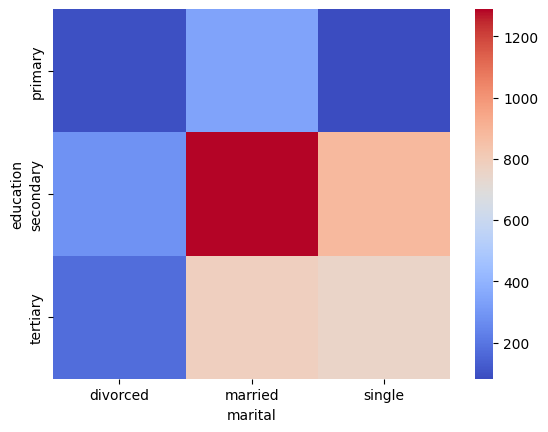

In [94]:
sns.heatmap(pd.pivot_table(df[df['deposit'] == 'yes'], index = 'education', columns = 'marital', values = 'deposit_bool', aggfunc = 'count'), cmap = 'coolwarm')

plt.show()

In [91]:
pd.pivot_table(df[df['deposit'] == 'no'], index = 'education', columns = 'marital', values = 'deposit_bool', aggfunc = 'count')

marital,divorced,married,single
education,,,
primary,91,641,100
secondary,370,1830,866
tertiary,163,832,531


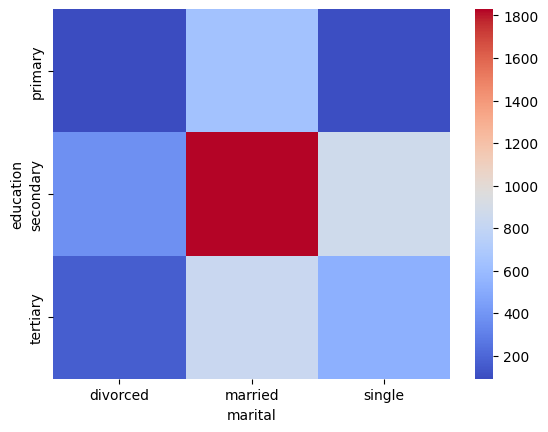

In [93]:
sns.heatmap(pd.pivot_table(df[df['deposit'] == 'no'], index = 'education', columns = 'marital', values = 'deposit_bool', aggfunc = 'count'), cmap = 'coolwarm')

plt.show()

## Часть 3: преобразование данных

### Задание 1

In [95]:
df['education'].value_counts()

secondary    5517
tertiary     3239
primary      1349
Name: education, dtype: int64

In [96]:
from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()
df['education'] = lab_enc.fit_transform(df['education'])

In [97]:
df['education'].value_counts()

1    5517
2    3239
0    1349
Name: education, dtype: int64

In [98]:
df['education'].sum()

11995

In [105]:
df['age_cat'] = lab_enc.fit_transform(df['age_cat'])

In [106]:
df['age_cat'].value_counts()

0    3961
1    2382
2    1654
4    1455
3     653
Name: age_cat, dtype: int64

In [101]:
df['deposit'] = df['deposit_bool']

In [102]:
df.drop(labels = ['deposit_bool'], axis = 1, inplace = True)

In [103]:
df['deposit'].value_counts()

0    5424
1    4681
Name: deposit, dtype: int64

In [107]:
df['deposit'].describe()

count    10105.000000
mean         0.463236
std          0.498671
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: deposit, dtype: float64

In [110]:
df['default'] = np.where(df['default'] == 'yes', 1, 0)
df['housing'] = np.where(df['housing'] == 'yes', 1, 0)
df['loan'] = np.where(df['loan'] == 'yes', 1, 0)

In [115]:
df['default'].mean() + df['housing'].mean() + df['loan'].mean()

0.6354280059376547

In [121]:
# job
# marital
# contact
# month
# poutcome -> dummy

df = pd.get_dummies(df, columns = ['job', 'marital', 'contact', 'month', 'poutcome'], 
               prefix = ['job', 'marital', 'contact', 'month', 'poutcome'])

In [133]:
df

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,1,0,2343.0,1,0,5,1042,1,-1,...,0,0,1,0,0,0,0,0,0,1
1,56,1,0,45.0,0,0,5,1467,1,-1,...,0,0,1,0,0,0,0,0,0,1
2,41,1,0,1270.0,1,0,5,1389,1,-1,...,0,0,1,0,0,0,0,0,0,1
3,55,1,0,2476.0,1,0,5,579,1,-1,...,0,0,1,0,0,0,0,0,0,1
4,54,2,0,184.0,0,0,5,673,2,-1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,0,0,1.0,1,0,20,257,1,-1,...,0,0,0,0,0,0,0,0,0,1
11158,39,1,0,733.0,0,0,16,83,4,-1,...,1,0,0,0,0,0,0,0,0,1
11159,32,1,0,29.0,0,0,19,156,2,-1,...,0,0,0,0,0,0,0,0,0,1
11160,43,1,0,0.0,0,1,8,9,2,172,...,0,0,1,0,0,0,1,0,0,0


In [135]:
df[['poutcome_success', 'duration', 'contact_cellular', 'deposit']]

,poutcome_success,duration,contact_cellular,deposit
0,0,1042,0,1
1,0,1467,0,1
2,0,1389,0,1
3,0,579,0,1
4,0,673,0,1
...,...,...,...,...
11157,0,257,1,0
11158,0,83,0,0
11159,0,156,1,0
11160,0,9,1,0


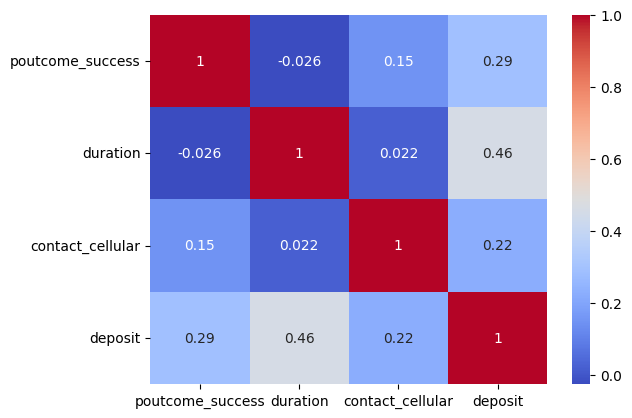

In [136]:
# постройте корреляционную матрицу и оцените данные на предмет наличия мультиколлинеарности
sns.heatmap(df[['poutcome_success', 'duration', 'contact_cellular', 'deposit']].corr(), annot = True, cmap = 'coolwarm')

plt.show()

In [154]:
df.corr()

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
age,1.000000,-0.191124,-0.009929,0.115164,-0.164196,-0.026357,0.000396,-0.006007,-0.001143,0.006107,...,0.009769,0.024785,-0.119656,0.026875,0.056998,0.036352,0.001994,-0.020942,0.060009,-0.031455
education,-0.191124,1.000000,-0.015692,0.043251,-0.094350,-0.052566,0.008989,-0.016869,-0.012280,0.024123,...,-0.036503,0.052196,-0.104157,0.028704,0.027617,0.030846,0.019845,0.015103,0.070489,-0.069069
default,-0.009929,-0.015692,1.000000,-0.110928,0.009551,0.074786,0.018724,-0.008162,0.033404,-0.037323,...,0.019626,-0.020028,-0.001761,0.000544,-0.023931,-0.016977,-0.025450,-0.017923,-0.041510,0.055032
balance,0.115164,0.043251,-0.110928,1.000000,-0.094919,-0.113089,-0.009987,0.025781,-0.042689,0.045155,...,0.039753,0.043832,-0.098073,0.081861,0.057041,0.047841,0.031040,0.028111,0.073358,-0.085456
housing,-0.164196,-0.094350,0.009551,-0.094919,1.000000,0.072252,-0.022644,0.038492,0.006257,0.064138,...,-0.073133,-0.075948,0.432605,-0.000219,-0.092026,-0.086893,0.085167,0.009830,-0.134477,0.024082
loan,-0.026357,-0.052566,0.074786,-0.113089,0.072252,1.000000,0.019136,0.001476,0.033889,-0.030788,...,-0.014897,-0.041105,0.002778,0.017720,-0.032357,-0.046196,0.007458,-0.019289,-0.082098,0.059235
day,0.000396,0.008989,0.018724,-0.009987,-0.022644,0.019136,1.000000,-0.016695,0.142169,-0.078757,...,-0.182032,-0.044303,-0.014580,0.056471,0.072179,-0.068744,-0.071175,-0.008806,-0.044366,0.085442
duration,-0.006007,-0.016869,-0.008162,0.025781,0.038492,0.001476,-0.016695,1.000000,-0.042576,-0.033053,...,-0.003061,-0.034640,0.007983,-0.015655,-0.012541,-0.012077,-0.039476,-0.009497,-0.025971,0.050571
campaign,-0.001143,-0.012280,0.033404,-0.042689,0.006257,0.033889,0.142169,-0.042576,1.000000,-0.105214,...,0.046763,-0.030574,-0.044348,-0.077307,-0.071519,-0.048672,-0.082282,-0.024854,-0.094260,0.134842
pdays,0.006107,0.024123,-0.037323,0.045155,0.064138,-0.030788,-0.078757,-0.033053,-0.105214,1.000000,...,-0.093551,0.024192,0.028678,-0.007350,0.079833,0.110907,0.608719,0.338049,0.326215,-0.824031


In [155]:
df.corr().unstack()

age               age                 1.000000
                  education          -0.191124
                  default            -0.009929
                  balance             0.115164
                  housing            -0.164196
                                        ...   
poutcome_unknown  month_sep          -0.137132
                  poutcome_failure   -0.606736
                  poutcome_other     -0.386326
                  poutcome_success   -0.555044
                  poutcome_unknown    1.000000
Length: 2116, dtype: float64

In [159]:
df.corr().unstack().sort_values(ascending = False).drop_duplicates()

age               age                 1.000000
poutcome_failure  pdays               0.608719
job_retired       age                 0.545524
job_management    education           0.518735
previous          pdays               0.513708
                                        ...   
poutcome_failure  poutcome_unknown   -0.606736
poutcome_unknown  previous           -0.628346
marital_married   marital_single     -0.779038
poutcome_unknown  pdays              -0.824031
contact_unknown   contact_cellular   -0.837885
Length: 1036, dtype: float64

### Задания 7 и 8

In [161]:
X = df.drop(['deposit'], axis=1)
y = df['deposit']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [163]:
X_test.shape

(3335, 45)

In [167]:
y_test.mean()

0.46326836581709147

### Задание 9

In [168]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif #score_func

best_param = SelectKBest(score_func = f_classif, k = 15)

In [170]:
best_param.fit(X_train, y_train)

SelectKBest(k=15)

In [172]:
X_train.columns[best_param.get_support(indices = True)].tolist()

['balance',
 'housing',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'age_cat',
 'contact_cellular',
 'contact_unknown',
 'month_mar',
 'month_may',
 'month_oct',
 'month_sep',
 'poutcome_success',
 'poutcome_unknown']

In [176]:
X_train = X_train[X_train.columns[best_param.get_support(indices = True)].tolist()]

In [178]:
X_test = X_test[['balance',
 'housing',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'age_cat',
 'contact_cellular',
 'contact_unknown',
 'month_mar',
 'month_may',
 'month_oct',
 'month_sep',
 'poutcome_success',
 'poutcome_unknown']]

### Задание 10

In [169]:
from sklearn.preprocessing import MinMaxScaler

In [184]:
minmax_scaler = MinMaxScaler()

In [185]:
minmax_scaler.fit(X_train)
X_train_scaled = minmax_scaler.transform(X_train)
X_test_scaled = minmax_scaler.transform(X_test)

In [187]:
np.mean(X_test_scaled[:, 0]) # для первого столбца!

0.46823674223097866

# Часть 4: Решение задачи классификации: логистическая регрессия и решающие деревья

### Задание 1

In [188]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver = 'sag', random_state = 42, max_iter = 1000)
clf.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='sag')

In [189]:
y_pred = clf.predict(X_test_scaled)

In [190]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8047976011994002

### Задания 2,3,4

In [192]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
tree_clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [198]:
y_pred_train = tree_clf.predict(X_train_scaled)

In [199]:
accuracy_score(y_train, y_pred_train)

1.0

In [193]:
y_pred = tree_clf.predict(X_test_scaled)

In [195]:
accuracy_score(y_test, y_pred)

0.7472263868065967

### Задание 5

In [200]:
from sklearn.model_selection import GridSearchCV

In [203]:
list(range(5, 21))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [233]:
param_grid = {
    'max_depth': list(range(5, 21))
}

In [234]:
grid_rf = GridSearchCV(
    estimator = DecisionTreeClassifier(criterion = 'entropy', random_state = 42),
    param_grid = param_grid,
    cv = 5,
    n_jobs = -1,
    return_train_score = True,
    scoring = 'accuracy'
)

%time
grid_rf.fit(X_train_scaled, y_train)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                       16, 17, 18, 19, 20]},
             return_train_score=True, scoring='accuracy')

In [235]:
grid_rf.best_params_ # потому что scoring!

{'max_depth': 9}

In [217]:
y_train_pred = grid_rf.predict(X_train_scaled)

In [218]:
accuracy_score(y_train, y_train_pred)

0.8522895125553914

In [219]:
y_test_pred = grid_rf.predict(X_test_scaled)

In [220]:
accuracy_score(y_test, y_test_pred)

0.8101949025487256

In [236]:
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 7, 10]
}

In [237]:
grid_rf = GridSearchCV(
    estimator = DecisionTreeClassifier(criterion = 'entropy', random_state = 42),
    param_grid = param_grid,
    cv = 5,
    n_jobs = -1,
    return_train_score = True,
    scoring = 'f1'
)

%time
grid_rf.fit(X_train_scaled, y_train)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 4.05 µs


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 5, 7, 10]},
             return_train_score=True, scoring='f1')

In [238]:
grid_rf.best_params_

{'max_depth': 7, 'min_samples_split': 10}

In [240]:
y_test_pred = grid_rf.predict(X_test_scaled)

In [227]:
from sklearn.metrics import f1_score

In [241]:
f1_score(y_test, y_test_pred)

0.805484693877551

# Часть 5: Решение задачи классификации: ансамбли моделей и построение прогноза

### Задание 1

In [202]:
from sklearn.ensemble import RandomForestClassifier

In [243]:
clf = RandomForestClassifier(n_estimators = 100, criterion = 'gini', min_samples_leaf = 5,
                             max_depth = 10, random_state = 42)

In [244]:
clf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, random_state=42)

In [245]:
y_pred = clf.predict(X_test_scaled)

In [252]:
accuracy_score(y_test, y_pred)

0.8284857571214392

In [251]:
from sklearn.metrics import recall_score

In [253]:
recall_score(y_test, y_pred)

0.8349514563106796

### Задания 2 и 3

In [254]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(learning_rate = 0.05, n_estimators = 300, min_samples_leaf = 5, 
                                max_depth = 5, random_state = 42)

gb.fit(X_train_scaled, y_train)
y_train_pred = gb.predict(X_train_scaled)
y_test_pred = gb.predict(X_test_scaled)

print('Train: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
print('Test: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

Train: 0.88
Test: 0.82


In [261]:
gb.feature_importances_

array([5.97643550e-02, 4.65833677e-02, 5.01986860e-01, 1.71007263e-02,
       5.56468221e-02, 8.90089468e-03, 4.21017535e-02, 4.60013696e-03,
       7.37616775e-02, 2.61442415e-02, 1.45077474e-02, 1.88237113e-02,
       1.34275061e-02, 1.16263701e-01, 3.86499211e-04])

In [267]:
pd.Series(data = gb.feature_importances_, index = X_train.columns).sort_values(ascending = False)

duration            0.501987
poutcome_success    0.116264
contact_unknown     0.073762
balance             0.059764
pdays               0.055647
housing             0.046583
age_cat             0.042102
month_mar           0.026144
month_oct           0.018824
campaign            0.017101
month_may           0.014508
month_sep           0.013428
previous            0.008901
contact_cellular    0.004600
poutcome_unknown    0.000386
dtype: float64

### Задание 4

In [257]:
from sklearn.ensemble import StackingClassifier #StackingClassifier(estimators, final_estimator)

In [268]:
logreg_clf = LogisticRegression(solver = 'sag', random_state = 42, max_iter = 1000)

In [269]:
tree_clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 9, random_state = 42)

In [270]:
rf_clf = RandomForestClassifier(n_estimators = 100, criterion = 'gini', min_samples_leaf = 5,
                             max_depth = 10, random_state = 42)

In [272]:
estimators = [('LogisticRegression', logreg_clf),
             ('DecisionTreeClassifier', tree_clf),
             ('RandomForestClassifier', rf_clf)]

In [273]:
metamodel = StackingClassifier(estimators = estimators, final_estimator = LogisticRegression())

In [274]:
metamodel.fit(X_train_scaled, y_train)

StackingClassifier(estimators=[('LogisticRegression',
                                LogisticRegression(max_iter=1000,
                                                   random_state=42,
                                                   solver='sag')),
                               ('DecisionTreeClassifier',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=9,
                                                       random_state=42)),
                               ('RandomForestClassifier',
                                RandomForestClassifier(max_depth=10,
                                                       min_samples_leaf=5,
                                                       random_state=42))],
                   final_estimator=LogisticRegression())

In [275]:
y_pred = metamodel.predict(X_test_scaled)

In [256]:
from sklearn.metrics import precision_score

In [276]:
precision_score(y_test, y_pred)

0.8071292170591979

### Optuna

In [277]:
import optuna

In [285]:
from sklearn.model_selection import cross_val_score

def optuna_rf(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
    max_depth = trial.suggest_int('max_depth', 10, 30, 1)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)
    
    model = RandomForestClassifier(n_estimators = n_estimators, max_depth = max_depth, 
                                   min_samples_leaf = min_samples_leaf, random_state = 42)
    
    score = cross_val_score(model, X=X_train_scaled, y=y_train, cv=5, scoring='f1', n_jobs=-1).mean()
    return score

%time
# cоздаем объект исследования
study = optuna.create_study(study_name='RandomForestClassifier', direction='maximize')
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_rf, n_trials=50)

print('Наилучшие значения гиперпараметров {}'.format(study.best_params))

[I 2023-05-05 11:01:37,287] A new study created in memory with name: RandomForestClassifier


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 4.53 µs


[I 2023-05-05 11:01:38,887] Trial 0 finished with value: 0.8209893980479451 and parameters: {'n_estimators': 150, 'max_depth': 19, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.8209893980479451.
[I 2023-05-05 11:01:39,566] Trial 1 finished with value: 0.818956731550597 and parameters: {'n_estimators': 119, 'max_depth': 10, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.8209893980479451.
[I 2023-05-05 11:01:40,322] Trial 2 finished with value: 0.8221290210798271 and parameters: {'n_estimators': 125, 'max_depth': 15, 'min_samples_leaf': 8}. Best is trial 2 with value: 0.8221290210798271.
[I 2023-05-05 11:01:41,635] Trial 3 finished with value: 0.8267724888527486 and parameters: {'n_estimators': 179, 'max_depth': 20, 'min_samples_leaf': 2}. Best is trial 3 with value: 0.8267724888527486.
[I 2023-05-05 11:01:42,354] Trial 4 finished with value: 0.821501619099611 and parameters: {'n_estimators': 123, 'max_depth': 28, 'min_samples_leaf': 10}. Best is trial 3 with value: 0.826

[I 2023-05-05 11:02:18,892] Trial 38 finished with value: 0.8261231319130703 and parameters: {'n_estimators': 187, 'max_depth': 25, 'min_samples_leaf': 4}. Best is trial 27 with value: 0.8298917790383262.
[I 2023-05-05 11:02:20,311] Trial 39 finished with value: 0.8267724888527486 and parameters: {'n_estimators': 179, 'max_depth': 20, 'min_samples_leaf': 2}. Best is trial 27 with value: 0.8298917790383262.
[I 2023-05-05 11:02:21,285] Trial 40 finished with value: 0.8233571069388461 and parameters: {'n_estimators': 153, 'max_depth': 15, 'min_samples_leaf': 7}. Best is trial 27 with value: 0.8298917790383262.
[I 2023-05-05 11:02:22,420] Trial 41 finished with value: 0.829661398120578 and parameters: {'n_estimators': 166, 'max_depth': 16, 'min_samples_leaf': 3}. Best is trial 27 with value: 0.8298917790383262.
[I 2023-05-05 11:02:23,644] Trial 42 finished with value: 0.8243241339965582 and parameters: {'n_estimators': 168, 'max_depth': 17, 'min_samples_leaf': 3}. Best is trial 27 with val

Наилучшие значения гиперпараметров {'n_estimators': 192, 'max_depth': 16, 'min_samples_leaf': 3}


In [286]:
clf = RandomForestClassifier(n_estimators = 192, max_depth = 16, min_samples_leaf = 3)

In [287]:
clf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=16, min_samples_leaf=3, n_estimators=192)

In [288]:
y_pred = clf.predict(X_test_scaled)

In [289]:
f1_score(y_test, y_pred)

0.8171500630517025

In [290]:
accuracy_score(y_test, y_pred)

0.8260869565217391